In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
columns=['Engine.ID', 'cycle', 'setting1', 'setting2', 'setting3'] + ['iot{}'.format(x) for x in range(1,27)]

train, test = (pd.read_csv('data/{}_FD001.txt'.format(x), sep=' ', header=None, names=columns) for x in ['train', 'test'])
rul = pd.read_csv('data/RUL_FD001.txt', sep=' ', header=None)

In [3]:
train.head()

,Engine.ID,cycle,setting1,setting2,setting3,iot1,iot2,iot3,iot4,iot5,...,iot17,iot18,iot19,iot20,iot21,iot22,iot23,iot24,iot25,iot26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,Engine.ID,cycle,setting1,setting2,setting3,iot1,iot2,iot3,iot4,iot5,...,iot17,iot18,iot19,iot20,iot21,iot22,iot23,iot24,iot25,iot26
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,392,2388,100.0,38.86,23.3735,NaN,NaN,NaN,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,393,2388,100.0,39.02,23.3916,NaN,NaN,NaN,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,393,2388,100.0,39.08,23.4166,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,391,2388,100.0,39.00,23.3737,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,390,2388,100.0,38.99,23.4130,NaN,NaN,NaN,NaN,NaN


# EDA

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
1.	unit number
2.	time, in cycles
3.	operational setting 1
4.	operational setting 2
5.	operational setting 3
6.	sensor measurement  1
7.	sensor measurement  2
...
26.	sensor measurement  26

In [5]:
train.describe()

,Engine.ID,cycle,setting1,setting2,setting3,iot1,iot2,iot3,iot4,iot5,...,iot17,iot18,iot19,iot20,iot21,iot22,iot23,iot24,iot25,iot26
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0,0.0,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN,NaN,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN,NaN,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN,NaN,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN,NaN,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN,NaN,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN,NaN,NaN,NaN


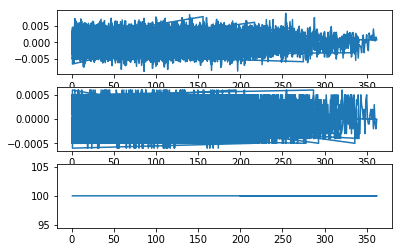

In [6]:
settings = train[['Engine.ID', 'cycle', 'setting1', 'setting2', 'setting3']]
settings.set_index('cycle', inplace=True)
plt.subplot(311)
plt.plot(settings[['setting1']])
plt.subplot(312)
plt.plot(settings[['setting2']])
plt.subplot(313)
plt.plot(settings[['setting3']])